In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad

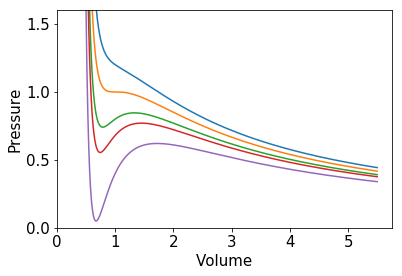

In [5]:
T = [1.05,1.0, 0.95, 0.92, 0.85]

for i in T:
    def norm_P(V):
        return 8.0*i/(3*V-1) - 3.0/(V**2)
    V = np.linspace(0.5,5.5,1000)
    P = norm_P(V)
    
    plt.plot(V,P)

plt.xticks(np.arange(0,5.5,1), fontsize=15)
plt.yticks(np.arange(0,5.5,0.5), fontsize=15)
plt.ylim(0,1.6)
plt.xlabel("Volume")
plt.ylabel("Pressure")
plt.savefig('Fig1.jpg')
plt.show()

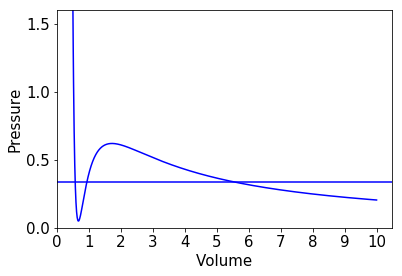

In [6]:
T1 = 0.85

def norm_P(V):
    return (8.0*T1)/(3*V-1) - 3.0/(V**2)

def get_equal_area(p):
    coeff = [1, -1/3*(1+8*T1/p), 3/p, -1/p]
    r = np.roots(coeff)
    r.sort()
    A1 = r[1] - r[0]*p - quad(norm_P, r[0], r[1])
    A2 = quad(norm_P, r[1], r[2]) - (r[2] - r[1])*p
    return A1-A2

initialp = 0.5
p = fsolve(get_equal_area, initialp)
coefff = [1, -1/3*(1+8*T1/p), 3/p, -1/p]
rr = np.roots(coefff)
rr.sort()
Aa1 = rr[1] - rr[0]*p - quad(norm_P, rr[0], rr[1])
Aa2 = quad(norm_P, rr[1], rr[2]) - (rr[2] - rr[1])*p


V = np.linspace(0.5,10,1000)
P = norm_P(V)   
plt.axhline(y=p, color='blue')
plt.plot(V,P, 'b')   
plt.xticks(np.arange(0,10.5,1), fontsize=15)
plt.yticks(np.arange(0,5.5,0.5),fontsize=15)
plt.ylim(0,1.6)
plt.xlabel("Volume")
plt.ylabel("Pressure")
plt.savefig('Fig2.jpg')
plt.show()